In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
titanic = pd.read_csv("titanic_train.csv")

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


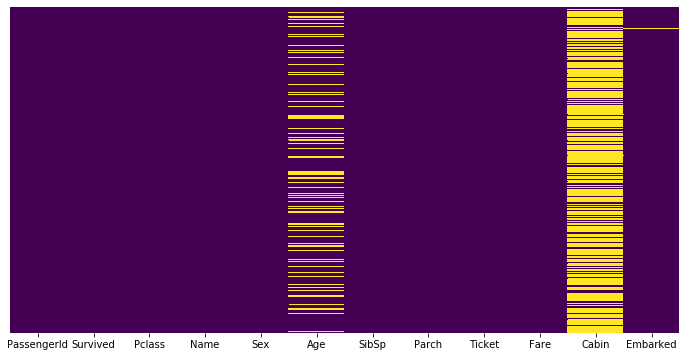

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis') # mostra os dados faltantes do dataset

In [10]:
sns.set_style('whitegrid')

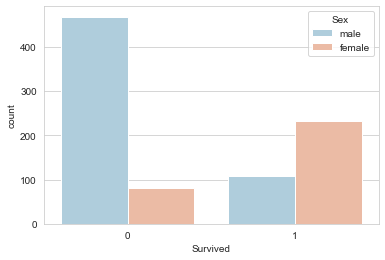

In [13]:
sns.countplot(x='Survived', data =titanic, hue ='Sex', palette='RdBu_r')#mostra os sobreviventes por sexo

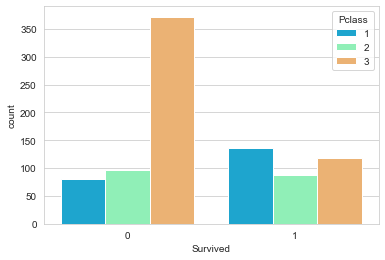

In [14]:
sns.countplot(x='Survived', data =titanic, hue ='Pclass', palette='rainbow')#mostra os sobreviventes por classe social

In [ ]:
sns.countplot(x='Survived', data =titanic, hue ='Pclass', palette='rainbow')#mostra os sobreviventes por idade

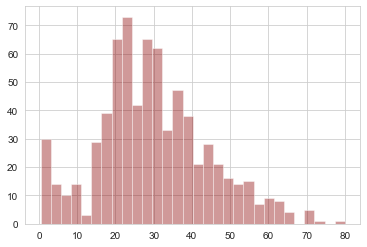

In [15]:
titanic['Age'].hist(bins=30, color='darkred', alpha=0.4)

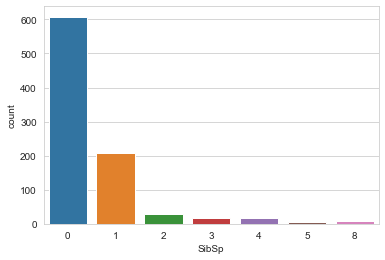

In [16]:
sns.countplot(x='SibSp', data=titanic)

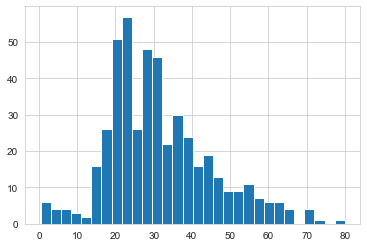

In [17]:
titanic[titanic['SibSp'] == 0]['Age'].hist(bins=30) #n sobreviveram e sem acompanhante, e faz a distribuição por idade

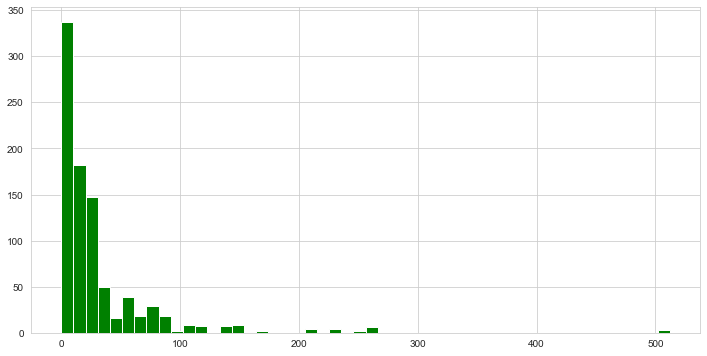

In [18]:
titanic['Fare'].hist(color='green', bins=50, figsize=(12, 6)) #quanto pagou

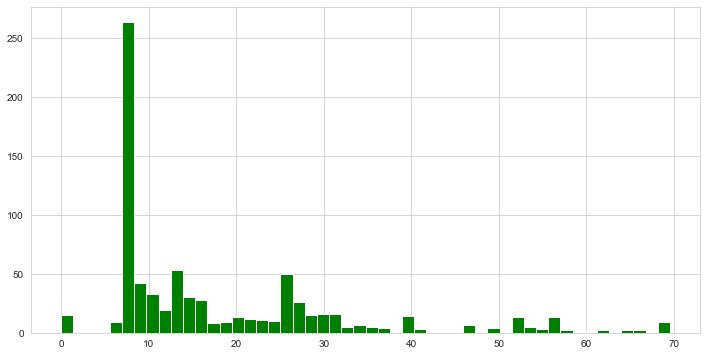

In [21]:
titanic[titanic['Fare']<70]['Fare'].hist(color='green', bins=50, figsize=(12, 6)) #quanto pagou, menor que 70

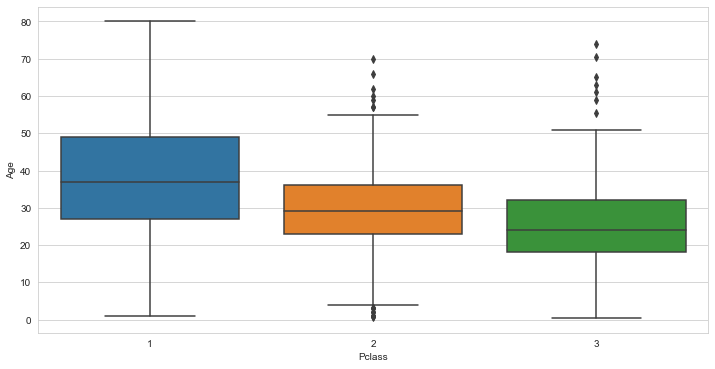

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass', y='Age', data=titanic)

In [26]:
def input_idade(cols):
    Idade = cols[0]
    Classe = cols[1]
    if pd.isnull(Idade):
        if Classe == 1:
            return 37
        elif Classe ==2:
            return 29
        else:
            return 24
    else:
        return Idade

In [27]:
titanic['Age'] = titanic[['Age', 'Pclass']].apply(input_idade, axis=1)

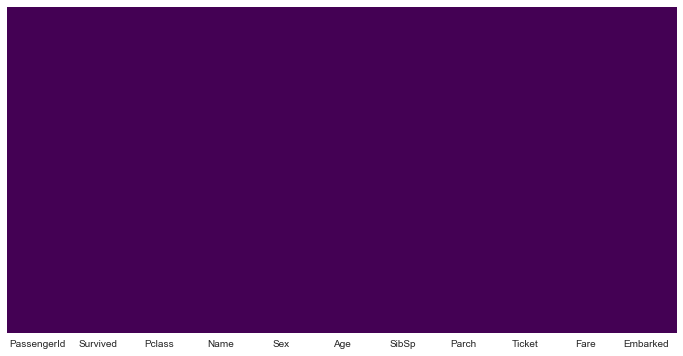

In [33]:
plt.figure(figsize=(12,6))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis') # mostra os dados faltantes do dataset

In [29]:
del titanic['Cabin']
#titanic.drop('Cabin', inplace=True)

In [32]:
titanic.dropna(inplace=True)

In [36]:
sex = pd.get_dummies(titanic['Sex'], drop_first=True)

In [37]:
embark = pd.get_dummies(titanic['Embarked'], drop_first=True)

In [38]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [39]:
titanic.drop(['Sex', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [40]:
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C
2,1,3,26.0,0,0,7.9250,S
3,1,1,35.0,1,0,53.1000,S
4,0,3,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S
887,1,1,19.0,0,0,30.0000,S
888,0,3,24.0,1,2,23.4500,S
889,1,1,26.0,0,0,30.0000,C


In [41]:
titanic = pd.concat([titanic, sex, embark], axis=1)

In [42]:
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,22.0,1,0,7.2500,S,1,0,1
1,1,1,38.0,1,0,71.2833,C,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,1,0,1
887,1,1,19.0,0,0,30.0000,S,0,0,1
888,0,3,24.0,1,2,23.4500,S,0,0,1
889,1,1,26.0,0,0,30.0000,C,1,0,0


In [44]:
del titanic['Embarked']

In [45]:
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(titanic.drop('Survived', axis=1),titanic['Survived'], test_size=0.3)

In [50]:
logmodel = LogisticRegression()

In [51]:
logmodel.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
prections = logmodel.predict(x_test)

In [53]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test, prections))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       167
           1       0.71      0.80      0.75       100

    accuracy                           0.81       267
   macro avg       0.79      0.80      0.80       267
weighted avg       0.81      0.81      0.81       267



In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
print(confusion_matrix(y_test, prections))

[[135  32]
 [ 20  80]]
